In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram

In [35]:
klasterCount = 4
featureCount = 2
std = 1.5 ** (0.5)
X, y = make_blobs(n_samples = 100, 
                  centers = klasterCount, 
                  n_features = featureCount, 
                  random_state = 1, 
                  cluster_std = std)
df = pd.DataFrame(X)
df['Class'] = y
df

,0,1,Class
0,-9.340436,-6.639243,2
1,-10.270008,-4.199226,1
2,-6.000718,-7.234165,2
3,-8.611755,-2.091961,1
4,0.477389,3.474206,0
...,...,...,...
95,-7.095032,-9.102603,2
96,-5.734237,-3.211450,3
97,-6.908105,-4.309889,3
98,-10.921658,-2.418905,1


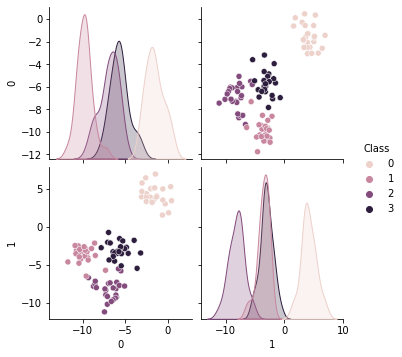

In [36]:
sns.pairplot(df,hue='Class')

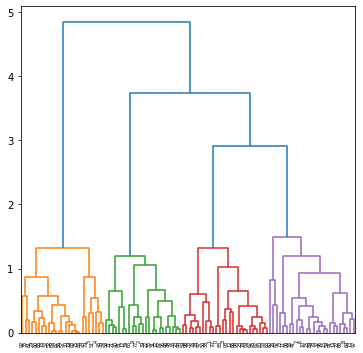

In [37]:
row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(6,6))
dendrogram(mergings, color_threshold=2)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


AgglomerativeClustering(n_clusters=4)


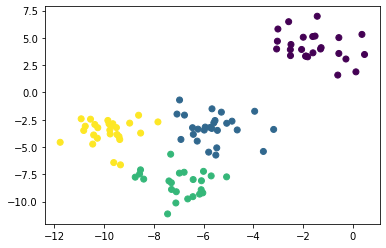

In [50]:
aggloclust=AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', n_clusters=4).fit(df_t)
print(aggloclust)
labels = aggloclust.labels_

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

In [54]:
print(confusion_matrix (y, labels))

NameError: name 'Y' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


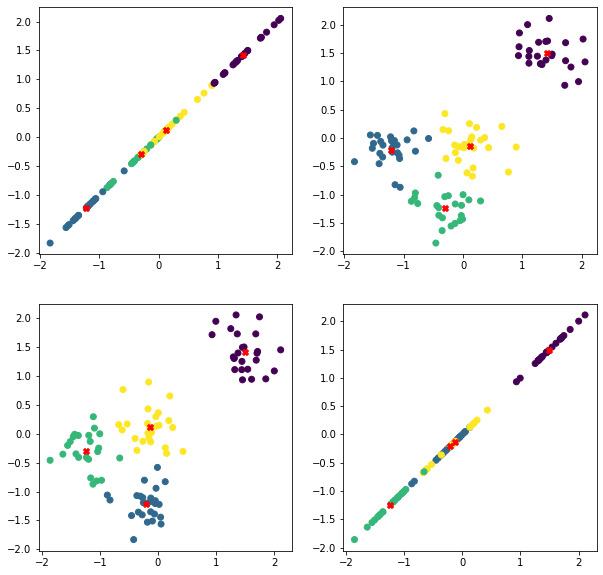

In [61]:
D = 2
N = 4
model = KMeans(n_clusters=N, max_iter=100)
model.fit(df_t)
pred=model.predict(df_t)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(df_t[i],df_t[j],c=pred)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j], marker='X', c='red')

In [62]:
print(confusion_matrix (y, pred))

[[25  0  0  0]
 [ 0 24  1  0]
 [ 0  1 22  2]
 [ 0  1  0 24]]


In [ ]:
means1 = []
means2 = []
means3 = []
means4 = []

def means(field, cluster, means):
    count = 0
    sum = 0
    i = 0
    for row in df_t[field]:
        if model.labels_[i] == cluster:
            count += 1
            sum += row
        i += 1
    means.append(sum / count)
    
means(0, 0, means1)
means(1, 0, means1)

means(0, 1, means2)
means(1, 1, means2)

means(0, 2, means3)
means(1, 2, means3)

means(0, 3, means4)
means(1, 3, means4)

digit = [0, 1]

plt.plot(digit, means1)
plt.plot(digit, means2)
plt.plot(digit, means3)
plt.plot(digit, means4)

In [ ]:
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(featureCount,featureCount,k)
    x=df_t[[field1, field2]].values #определим данные
    df_t['Class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный    
    model=type_model
    #построим модель    
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t[field1].min()-1, df_t[field1].max()+1
    min2, max2 = df_t[field2].min()-1, df_t[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t[field1],df_t[field2],c=y)
    #оценка точности модели
    plt.title(model.score(x,y)) 
    return splot

plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis',y=1, fontsize=15)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda 
k=0
for i in range(featureCount):
    for j in range (featureCount):
        k=k+1 
        splot=lda_qda(i, j,lda(),k) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(featureCount,featureCount,k)
    x=df_t[[field1, field2]].values #определим данные
    df_t['Class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный    
    model=type_model
    #построим модель    
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t[field1].min()-1, df_t[field1].max()+1
    min2, max2 = df_t[field2].min()-1, df_t[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t[field1],df_t[field2],c=y)
    #оценка точности модели
    plt.title(model.score(x,y)) 
    return splot

plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis',y=0.98, fontsize=15)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda 
k=0
for i in range(featureCount):
    for j in range (featureCount):
        k=k+1 
        splot=lda_qda(i, j,qda(),k) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()